# Probability Theory with Naive Bayes

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mnist

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

## MNIST Data

X_train len:  60000
X_test len:  10000
X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


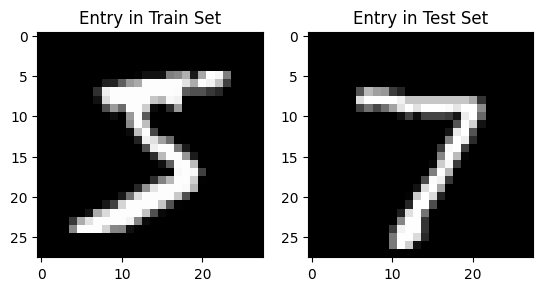

In [45]:
# mnist.init()
X_train, y_train, X_test, y_test = mnist.load()
print("X_train len: ", len(X_train))
print("X_test len: ", len(X_test))
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

plt.subplot(1, 2, 1)
plt.title("Entry in Train Set")
img = X_train[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Entry in Test Set")
img = X_test[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image


### Visualize Every Number

[0 1 2 3 4 5 6 7 8 9] [ 1  3  5  7  2  0 13 15 17  4]


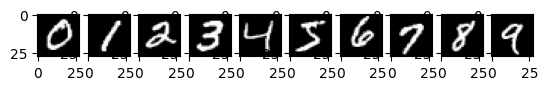

In [46]:
unique_values, indices = np.unique(y_train, return_index=True)
print(unique_values, indices)

for i, label_index in enumerate(indices):
    plt.subplot(1, len(indices), i + 1)
    img = X_train[label_index,:].reshape(28,28) # First image in the training set.
    plt.imshow(img,cmap='gray')
plt.show() # Show the image
    

## Naive Bayes Model

In [50]:
unique, counts = np.unique(y_train, return_counts=True)
sum_counts = np.sum(counts)
priors = np.divide(counts, sum_counts)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(y_pred)
print(y_test)

# print("Priors: ", nb.priors)

[7 2 1 ... 9 8 6]
[7 2 1 ... 4 5 6]


### Accuracy Results

Text(0.5, 1.0, 'Model Predictions With 83.65% Accuracy')

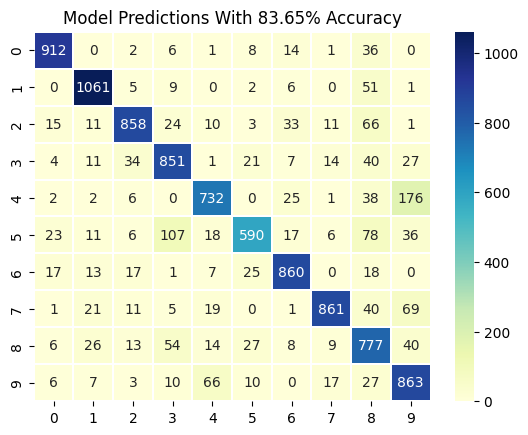

In [51]:
confusion_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(confusion_matrix, index=[f"{i}" for i in range(10)], columns=[f"{i}" for i in range(10)])
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", linewidths=0.35, cmap="YlGnBu")
plt.title(f"Model Predictions With {(np.sum(confusion_matrix.diagonal()) / y_test.shape[0]) * 100:.2f}% Accuracy")